In [16]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
import sys
import os

# Add the parent directory to sys.path
sys.path.append(os.path.abspath(os.path.join('..')))

# 1. Load Data

In [18]:
phish = pd.read_csv("../data/feature_engineered_data.csv")
phish.head()

,type,domain_age,domain_status,shortening_service,file_extension,domain_entropy,special_characters_count,suspicious_query,is_common_tld,domain_length,url_length,is_https,is_http,sensitive_words
0,2,0,0,0,0,3.375000,0,0,0,16,16,0,0,0
1,0,9214,2,0,5,3.277613,0,0,1,11,35,0,0,0
2,0,9234,2,0,5,3.235926,0,0,1,14,31,0,0,0
3,1,0,0,0,5,3.308751,7,0,1,21,88,0,1,0
4,1,0,0,0,5,3.501398,5,0,1,23,235,0,1,0


In [19]:
phish.tail()

,type,domain_age,domain_status,shortening_service,file_extension,domain_entropy,special_characters_count,suspicious_query,is_common_tld,domain_length,url_length,is_https,is_http,sensitive_words
173683,3,0,0,0,0,0.000000,0,0,0,0,34,0,1,0
173684,3,0,0,0,0,0.000000,0,0,0,0,33,0,1,0
173685,3,0,0,0,0,0.000000,0,0,0,0,32,0,1,0
173686,3,0,0,0,6,3.794653,0,0,0,18,82,0,1,1
173687,3,0,0,0,0,0.000000,0,0,0,0,32,0,1,0


# 2. Analyze Data

In [20]:
phish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173688 entries, 0 to 173687
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   type                      173688 non-null  int64  
 1   domain_age                173688 non-null  int64  
 2   domain_status             173688 non-null  int64  
 3   shortening_service        173688 non-null  int64  
 4   file_extension            173688 non-null  int64  
 5   domain_entropy            173688 non-null  float64
 6   special_characters_count  173688 non-null  int64  
 7   suspicious_query          173688 non-null  int64  
 8   is_common_tld             173688 non-null  int64  
 9   domain_length             173688 non-null  int64  
 10  url_length                173688 non-null  int64  
 11  is_https                  173688 non-null  int64  
 12  is_http                   173688 non-null  int64  
 13  sensitive_words           173688 non-null  i

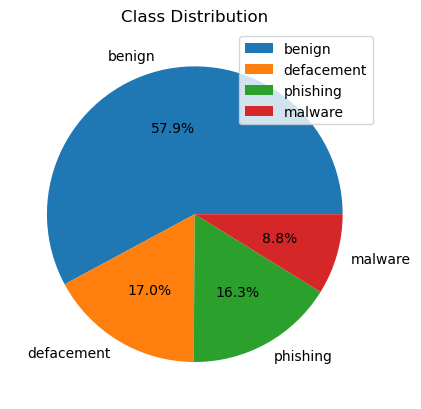

In [21]:
plt.pie(phish['type'].value_counts(), labels=['benign', 'defacement','phishing','malware'], autopct='%1.1f%%')
plt.title('Class Distribution')
plt.legend()
plt.show()

In [22]:
phish['type'].value_counts()

type
0    100500
1     29554
2     28318
3     15316
Name: count, dtype: int64

## 3. Data Processing

In [23]:
phish.isna().sum()

type                        0
domain_age                  0
domain_status               0
shortening_service          0
file_extension              0
domain_entropy              0
special_characters_count    0
suspicious_query            0
is_common_tld               0
domain_length               0
url_length                  0
is_https                    0
is_http                     0
sensitive_words             0
dtype: int64

In [24]:
# Remove duplicates
#phish = phish.drop_duplicates()

## Check for missing values and drop rows with missing values if necessary
#phish = phish.dropna()

## Verify the cleaned data
#phish.info()

In [25]:
phish['type'].value_counts()

type
0    100500
1     29554
2     28318
3     15316
Name: count, dtype: int64

## 4. Feature Selection

### 4.1 Function to extract features from URLs

###  Feature Importance Evaluation

In [26]:
from sklearn.model_selection import train_test_split
X= phish.drop('type', axis=1)
y = phish['type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train

,domain_age,domain_status,shortening_service,file_extension,domain_entropy,special_characters_count,suspicious_query,is_common_tld,domain_length,url_length,is_https,is_http,sensitive_words
16466,1789,2,0,5,3.624519,0,0,1,28,67,0,0,0
100001,10622,2,0,0,3.684184,0,0,1,20,31,0,0,0
93888,9554,2,1,5,3.323231,0,0,1,15,45,0,0,0
920,0,0,0,5,3.719295,7,0,1,26,91,0,1,0
6643,0,0,0,0,3.327820,0,0,1,16,97,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8353,102,2,0,0,3.463281,0,0,1,21,22,0,0,0
61790,10230,2,0,5,3.251629,0,0,1,12,25,0,0,0
54659,0,0,0,5,3.728644,0,0,0,42,74,0,0,0
107914,6581,2,0,0,3.250000,0,0,1,16,73,0,0,0


## Machine Learning

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

classifier = RandomForestClassifier(class_weight="balanced", random_state=42, n_estimators=200)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [28]:
print(
    f"Accuracy with Random Forest Classifier: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report with Random Forest Classifier:")
print(classification_report(y_test, y_pred))

Accuracy with Random Forest Classifier: 0.9570
Classification Report with Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     20181
           1       0.93      0.97      0.95      5828
           2       0.87      0.89      0.88      5542
           3       0.97      0.90      0.93      3187

    accuracy                           0.96     34738
   macro avg       0.94      0.94      0.94     34738
weighted avg       0.96      0.96      0.96     34738



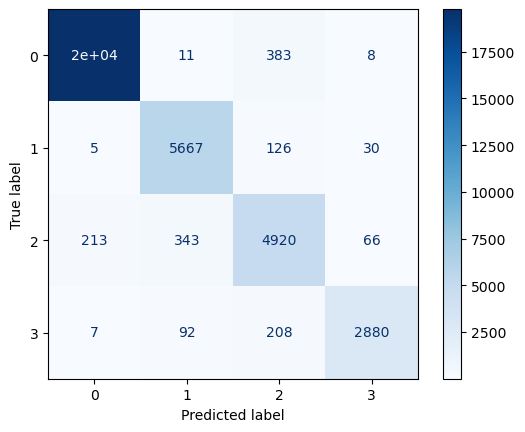

In [29]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

## Saving model

In [30]:
import pickle

# Save the model to a file
pickle.dump(classifier, open(f'../reports/random_forest_classifier.pkl', 'wb'))


##